In [1]:
import pandas as pd

# Read the excel file : 
df = pd.read_excel('ip_data.xlsx')
print(df)


       IP Address    Subnet Mask
0    192.168.1.24  255.255.255.0
1        10.1.5.4  255.255.254.0
2    172.16.20.33  255.255.255.0
3   192.168.100.7  255.255.252.0
4      10.0.3.112  255.255.255.0
5    172.16.1.200  255.255.254.0
6       10.2.1.56  255.255.252.0
7     192.168.2.3  255.255.255.0
8     172.16.50.1  255.255.252.0
9       10.10.0.5  255.255.254.0
10   192.168.3.14  255.255.255.0
11      10.20.4.6  255.255.252.0
12     172.16.8.9  255.255.254.0
13       10.4.3.2  255.255.255.0
14  192.168.20.44  255.255.252.0
15   172.16.40.22  255.255.255.0
16     10.0.0.200  255.255.254.0
17   192.168.10.1  255.255.255.0
18   172.16.15.15  255.255.254.0
19       10.3.3.9  255.255.252.0
20    192.168.4.5  255.255.255.0
21      10.50.2.7  255.255.255.0
22   172.16.60.30  255.255.252.0
23    192.168.7.8  255.255.254.0
24     10.15.5.50  255.255.252.0


In [2]:
import ipaddress
# The subnet calculations : 
# Example for one row : 
ip_str = '192.168.1.24'
subnet_mask = '255.255.255.0'

# convert subnet mask to prefix length
net = ipaddress.IPv4Network(f"{ip_str}/{subnet_mask}", strict=False)

print(f"CIDR: {net.with_prefixlen}")
print(f"Network address: {net.network_address}")
print(f"Broadcast address: {net.broadcast_address}")
print(f"Usable hosts: {net.num_addresses - 2}")


CIDR: 192.168.1.0/24
Network address: 192.168.1.0
Broadcast address: 192.168.1.255
Usable hosts: 254


In [3]:
# Apply to the whole dataframe : 

def analyze_subnet(row):
    ip_str = row['IP Address']
    subnet_mask = row['Subnet Mask']
    net = ipaddress.IPv4Network(f"{ip_str}/{subnet_mask}", strict=False)
    return pd.Series({
        'CIDR': net.with_prefixlen,
        'Network': str(net.network_address),
        'Broadcast': str(net.broadcast_address),
        'UsableHosts': net.num_addresses - 2
    })

results = df.apply(analyze_subnet, axis=1)
df = pd.concat([df, results], axis=1)
print(df)


       IP Address    Subnet Mask              CIDR        Network  \
0    192.168.1.24  255.255.255.0    192.168.1.0/24    192.168.1.0   
1        10.1.5.4  255.255.254.0       10.1.4.0/23       10.1.4.0   
2    172.16.20.33  255.255.255.0    172.16.20.0/24    172.16.20.0   
3   192.168.100.7  255.255.252.0  192.168.100.0/22  192.168.100.0   
4      10.0.3.112  255.255.255.0       10.0.3.0/24       10.0.3.0   
5    172.16.1.200  255.255.254.0     172.16.0.0/23     172.16.0.0   
6       10.2.1.56  255.255.252.0       10.2.0.0/22       10.2.0.0   
7     192.168.2.3  255.255.255.0    192.168.2.0/24    192.168.2.0   
8     172.16.50.1  255.255.252.0    172.16.48.0/22    172.16.48.0   
9       10.10.0.5  255.255.254.0      10.10.0.0/23      10.10.0.0   
10   192.168.3.14  255.255.255.0    192.168.3.0/24    192.168.3.0   
11      10.20.4.6  255.255.252.0      10.20.4.0/22      10.20.4.0   
12     172.16.8.9  255.255.254.0     172.16.8.0/23     172.16.8.0   
13       10.4.3.2  255.255.255.0  

In [4]:
# Group by subnet : 

subnet_counts = df.groupby('CIDR').size().reset_index(name='Count')
print(subnet_counts)


                CIDR  Count
0        10.0.0.0/23      1
1        10.0.3.0/24      1
2        10.1.4.0/23      1
3       10.10.0.0/23      1
4       10.15.4.0/22      1
5        10.2.0.0/22      1
6       10.20.4.0/22      1
7        10.3.0.0/22      1
8        10.4.3.0/24      1
9       10.50.2.0/24      1
10     172.16.0.0/23      1
11    172.16.14.0/23      1
12    172.16.20.0/24      1
13    172.16.40.0/24      1
14    172.16.48.0/22      1
15    172.16.60.0/22      1
16     172.16.8.0/23      1
17    192.168.1.0/24      1
18   192.168.10.0/24      1
19  192.168.100.0/22      1
20    192.168.2.0/24      1
21   192.168.20.0/22      1
22    192.168.3.0/24      1
23    192.168.4.0/24      1
24    192.168.6.0/23      1


In [5]:
# Export report : 

df.to_csv('subnet_report.csv', index=False)

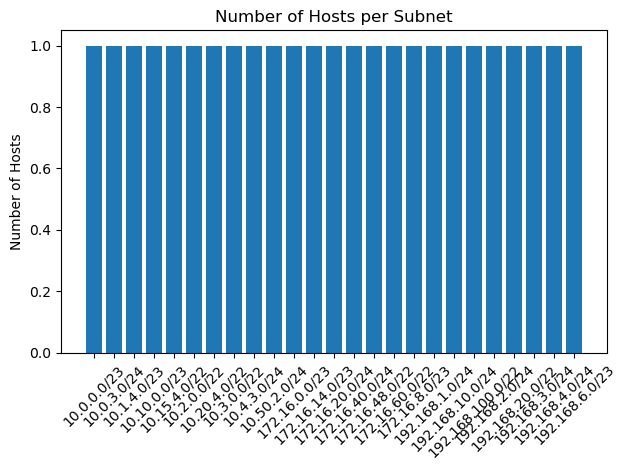

In [6]:
# Visualizing : 

import matplotlib.pyplot as plt

plt.bar(subnet_counts['CIDR'], subnet_counts['Count'])
plt.xticks(rotation=45)
plt.ylabel('Number of Hosts')
plt.title('Number of Hosts per Subnet')
plt.tight_layout()
plt.savefig('network_plot.png')
plt.show()